In [2]:
import os
import json
path ='labeled/'
full_list3=[]
i=0
for file in os.listdir(path):
    try:
        with open(path+"/"+file,'r', encoding='Utf-8') as json_data:
            res1_loaded = json.load(json_data) 
            
            k=res1_loaded['question']
            
            for answer in res1_loaded['answers']:
                l = [k]+[answer['answer'], answer['count'], answer['cluster'],answer['sentiment']] 
                full_list3.append(l) 
            
    except ValueError:
        #pass
        print(f'Unable to process {file}')
        print(f'Successfully constructed {len(res1_loaded)} files')

Unable to process 26765.json
Successfully constructed 3 files


In [3]:
print(l)

['Ваше впечатление за день?', 'продуктивное', 1, 'продуктивное', 'positives']


In [18]:
print(res1_loaded['answers'][0])

{'answer': 'бывало и хуже', 'count': 1, 'cluster': 'бывало и хуже', 'sentiment': 'neutrals'}


In [96]:
import pandas as pd
dat = pd.DataFrame(full_list3)
pd.set_option('display.max_colwidth', None) 
dat.columns = ['question','answer', 'count', 'cluster','sentiment']
dat

,question,answer,count,cluster,sentiment
0,Как проходит процесс адаптации?,как дома,1,как дома,context cluster
1,Какие большие примеры вас сейчас вдохновляют?,#трудкрут,1,трудкрут,positives
2,Какие большие примеры вас сейчас вдохновляют?,astra,1,astra,neutrals
3,Какие большие примеры вас сейчас вдохновляют?,atomic heart,1,atomic heart,neutrals
4,Какие большие примеры вас сейчас вдохновляют?,atomskills,1,atomskills,neutrals
...,...,...,...,...,...
5232,Ваше впечатление за день?,очень полезно и интересно,1,очень полезно,positives
5233,Ваше впечатление за день?,полезно,3,очень полезно,positives
5234,Ваше впечатление за день?,полезное мероприятие,1,очень полезно,positives
5235,Ваше впечатление за день?,позновательно,1,познавательно,positives


In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   question   5237 non-null   object
 1   answer     5237 non-null   object
 2   count      5237 non-null   int64 
 3   cluster    5237 non-null   object
 4   sentiment  5237 non-null   object
dtypes: int64(1), object(4)
memory usage: 204.7+ KB


In [4]:
dat.shape

(5237, 5)

In [24]:
dat.describe().applymap('{:,.2f}'.format)

,count
count,"5,237.00"
mean,1.62
std,3.55
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,130.00


In [25]:
dat.describe().applymap('{:,.2f}'.format)

,count
count,"5,237.00"
mean,1.62
std,3.55
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,130.00


In [8]:
dat.describe(include=['object'])

,question,answer,cluster,sentiment
count,5237,5237,5237,5237
unique,127,4461,3265,5
top,Какие большие цели сейчас вдохновляют лично вас?,развитие,знакомства,neutrals
freq,339,16,25,3329


In [160]:
dat['question'].unique()

array(['Как проходит процесс адаптации?',
       'Какие большие примеры вас сейчас вдохновляют?',
       'Что ожидаете от сегодняшнего дня', 'Где волонтеру учиться?',
       'Современный урок - какой он?',
       'Что планируете применять из пройденного обучения в ближайшее время?',
       'What countries are major investors abroad?',
       '1. Топ 3 дефицита компетенций по безопасности у молодых сотрудников, которые приходят в отрасль? / Top 3 safety competencies gaps among young employees entering the industry?',
       'Какие формы обучения самые эффективные / желанные?',
       'Что позволяет вам лично поддерживать уверенность и рабочий настрой?',
       'Ваши открытия за время обучения на модуле',
       '1. Назовите примеры современных кампусов / Please, write the relevant examples of modern campuses',
       'Какая наиболее важная для вас ценность не присутствует среди ценностей Росатома',
       'Слово дня/настрой на день для меня и всех участников!',
       'Что у проектной к

In [97]:
dat['question'].nunique()

127

In [98]:
dat['answer_count'] = (dat.groupby("question")['answer'].transform('nunique'))

In [99]:
dat['sentiment_count'] = (dat.groupby("sentiment")['question'].transform('nunique')) 


In [9]:
idx = pd.Index(dat['question'], name ='index_question')
idx.value_counts()

index_question
Какие большие цели сейчас вдохновляют лично вас?                                                               339
Что позволяет вам лично поддерживать уверенность и рабочий настрой?                                            230
Какие большие примеры вас сейчас вдохновляют?                                                                  220
На какие еще темы вы хотели бы поговорить с А.Е. Лихачевым?                                                    161
Что для вас важно?                                                                                             151
                                                                                                              ... 
Ваши ассоциации со словом КАЧЕСТВО?                                                                              3
Какие выводы Вы сделали после мастер-класса по применению инструмента "каракури" для оптимизации процессов?      2
От чего надо отказаться на стороне Заказчика?                    

In [157]:
dat['index_q']=0
k=0
i=0
for  i in range(0,len(dat['question'])-1):
    if dat['question'][i+1]==dat['question'][i]:
      dat['index_q'][i+1]=dat['index_q'][i]
    
    else: 
      dat['index_q'][i+1]=k+1
      k+=1
      
dat.tail(20)

<ipython-input-157-e7be0dc4d94f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['index_q']=0
<ipython-input-157-e7be0dc4d94f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['index_q'][i+1]=k+1


KeyError: 2

In [101]:

dat['answer_len'] = dat['answer'].str.count('\w+') 

In [102]:
dat['answer_len'].describe()

count    5237.000000
mean        2.024441
std         1.156976
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: answer_len, dtype: float64

In [103]:

dat['sentiment_all_in_all'] = (dat.groupby("sentiment")['index_q'].transform('nunique')) 

In [104]:
dat

,question,answer,count,cluster,sentiment,answer_count,sentiment_count,index_q,answer_len,sentiment_all_in_all
0,Как проходит процесс адаптации?,как дома,1,как дома,context cluster,1,13,0,2,13
1,Какие большие примеры вас сейчас вдохновляют?,#трудкрут,1,трудкрут,positives,220,86,1,1,103
2,Какие большие примеры вас сейчас вдохновляют?,astra,1,astra,neutrals,220,106,1,1,131
3,Какие большие примеры вас сейчас вдохновляют?,atomic heart,1,atomic heart,neutrals,220,106,1,2,131
4,Какие большие примеры вас сейчас вдохновляют?,atomskills,1,atomskills,neutrals,220,106,1,1,131
...,...,...,...,...,...,...,...,...,...,...
5232,Ваше впечатление за день?,очень полезно и интересно,1,очень полезно,positives,27,86,155,4,103
5233,Ваше впечатление за день?,полезно,3,очень полезно,positives,27,86,155,1,103
5234,Ваше впечатление за день?,полезное мероприятие,1,очень полезно,positives,27,86,155,2,103
5235,Ваше впечатление за день?,позновательно,1,познавательно,positives,27,86,155,1,103


In [15]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   question              5237 non-null   object
 1   answer                5237 non-null   object
 2   count                 5237 non-null   int64 
 3   cluster               5237 non-null   object
 4   sentiment             5237 non-null   object
 5   answer_count          5237 non-null   int64 
 6   sentiment_count       5237 non-null   int64 
 7   index_q               5237 non-null   int64 
 8   answer_len            5237 non-null   int64 
 9   sentiment_all_in_all  5237 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 409.3+ KB


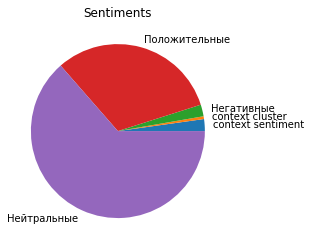

In [68]:
x = dat.groupby('sentiment_count').size().plot(kind = 'pie',labels=["context sentiment","context cluster","Негативные","Положительные", "Нейтральные"], title = 'Sentiments')  #e.g  in comparison to whole data

In [69]:
df2 = dat[dat['sentiment'] != 'context cluster']
df3 = df2[df2['sentiment'] != 'context sentiment']

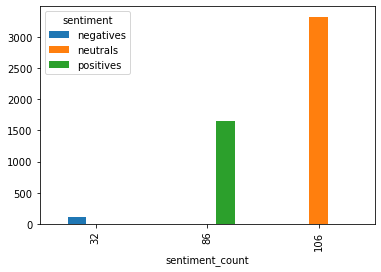

In [70]:

df3.groupby(['sentiment_count'])['sentiment'].value_counts().unstack().plot(kind = 'bar');

In [158]:
top10=dat['answer'].value_counts(dropna=False)
top10.head(10) 
#топ-10 - самые часто используемые слова пользователями

answer
развитие        16
общение         12
работа          10
безопасность     9
стабильность     8
знания           8
мотивация        8
москва           8
команда          7
интересно        7
Name: count, dtype: int64

In [105]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [106]:
dat['answer'] = dat['answer'].astype(str)

In [107]:
answer_text = " ".join(dat['answer'].to_list())

In [109]:
wordcloud = WordCloud(background_color="white").generate(answer_text)

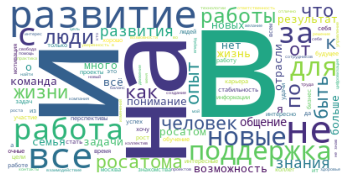

In [110]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [111]:
dat = dat[dat['answer'].apply(len) > 5]

In [112]:
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tpolons/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
noise = stopwords.words('russian')
punctuation_new = list(punctuation) + list('»') + list('«')+list('!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~')

In [113]:
from string import punctuation


In [115]:
def remove_stopwords(text):
    no_punct_text = ''.join([s for s in text if s not in punctuation_new])
    clean_text = [word for word in no_punct_text.lower().split()
                  if word not in noise]
    return ' '.join(clean_text)

In [116]:
dat['answer_text_clean'] = dat['answer'].apply(remove_stopwords)

<ipython-input-116-a8dbd6e631a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['answer_text_clean'] = dat['answer'].apply(remove_stopwords)


In [124]:
dat.loc[:,['answer', 'answer_text_clean']].sample(10)

,answer,answer_text_clean
5198,новые смыслы,новые смыслы
3012,сдать егэ,сдать егэ
920,безысходное,безысходное
4904,рост и динамика,рост динамика
1336,жизнь и здоровье коллег,жизнь здоровье коллег
2421,оао «химволокно» 7,оао химволокно 7
1030,поддержка со стороны лин.р-лей,поддержка стороны линрлей
3754,поддержка молодёжи,поддержка молодёжи
1651,культурные особенности орг-ии,культурные особенности оргии
3597,весело,весело


In [121]:
answer_text2 = " ".join(dat['answer_text_clean'].to_list())

In [126]:
wordcloud = WordCloud(background_color="white", 
                     ).generate(answer_text2)

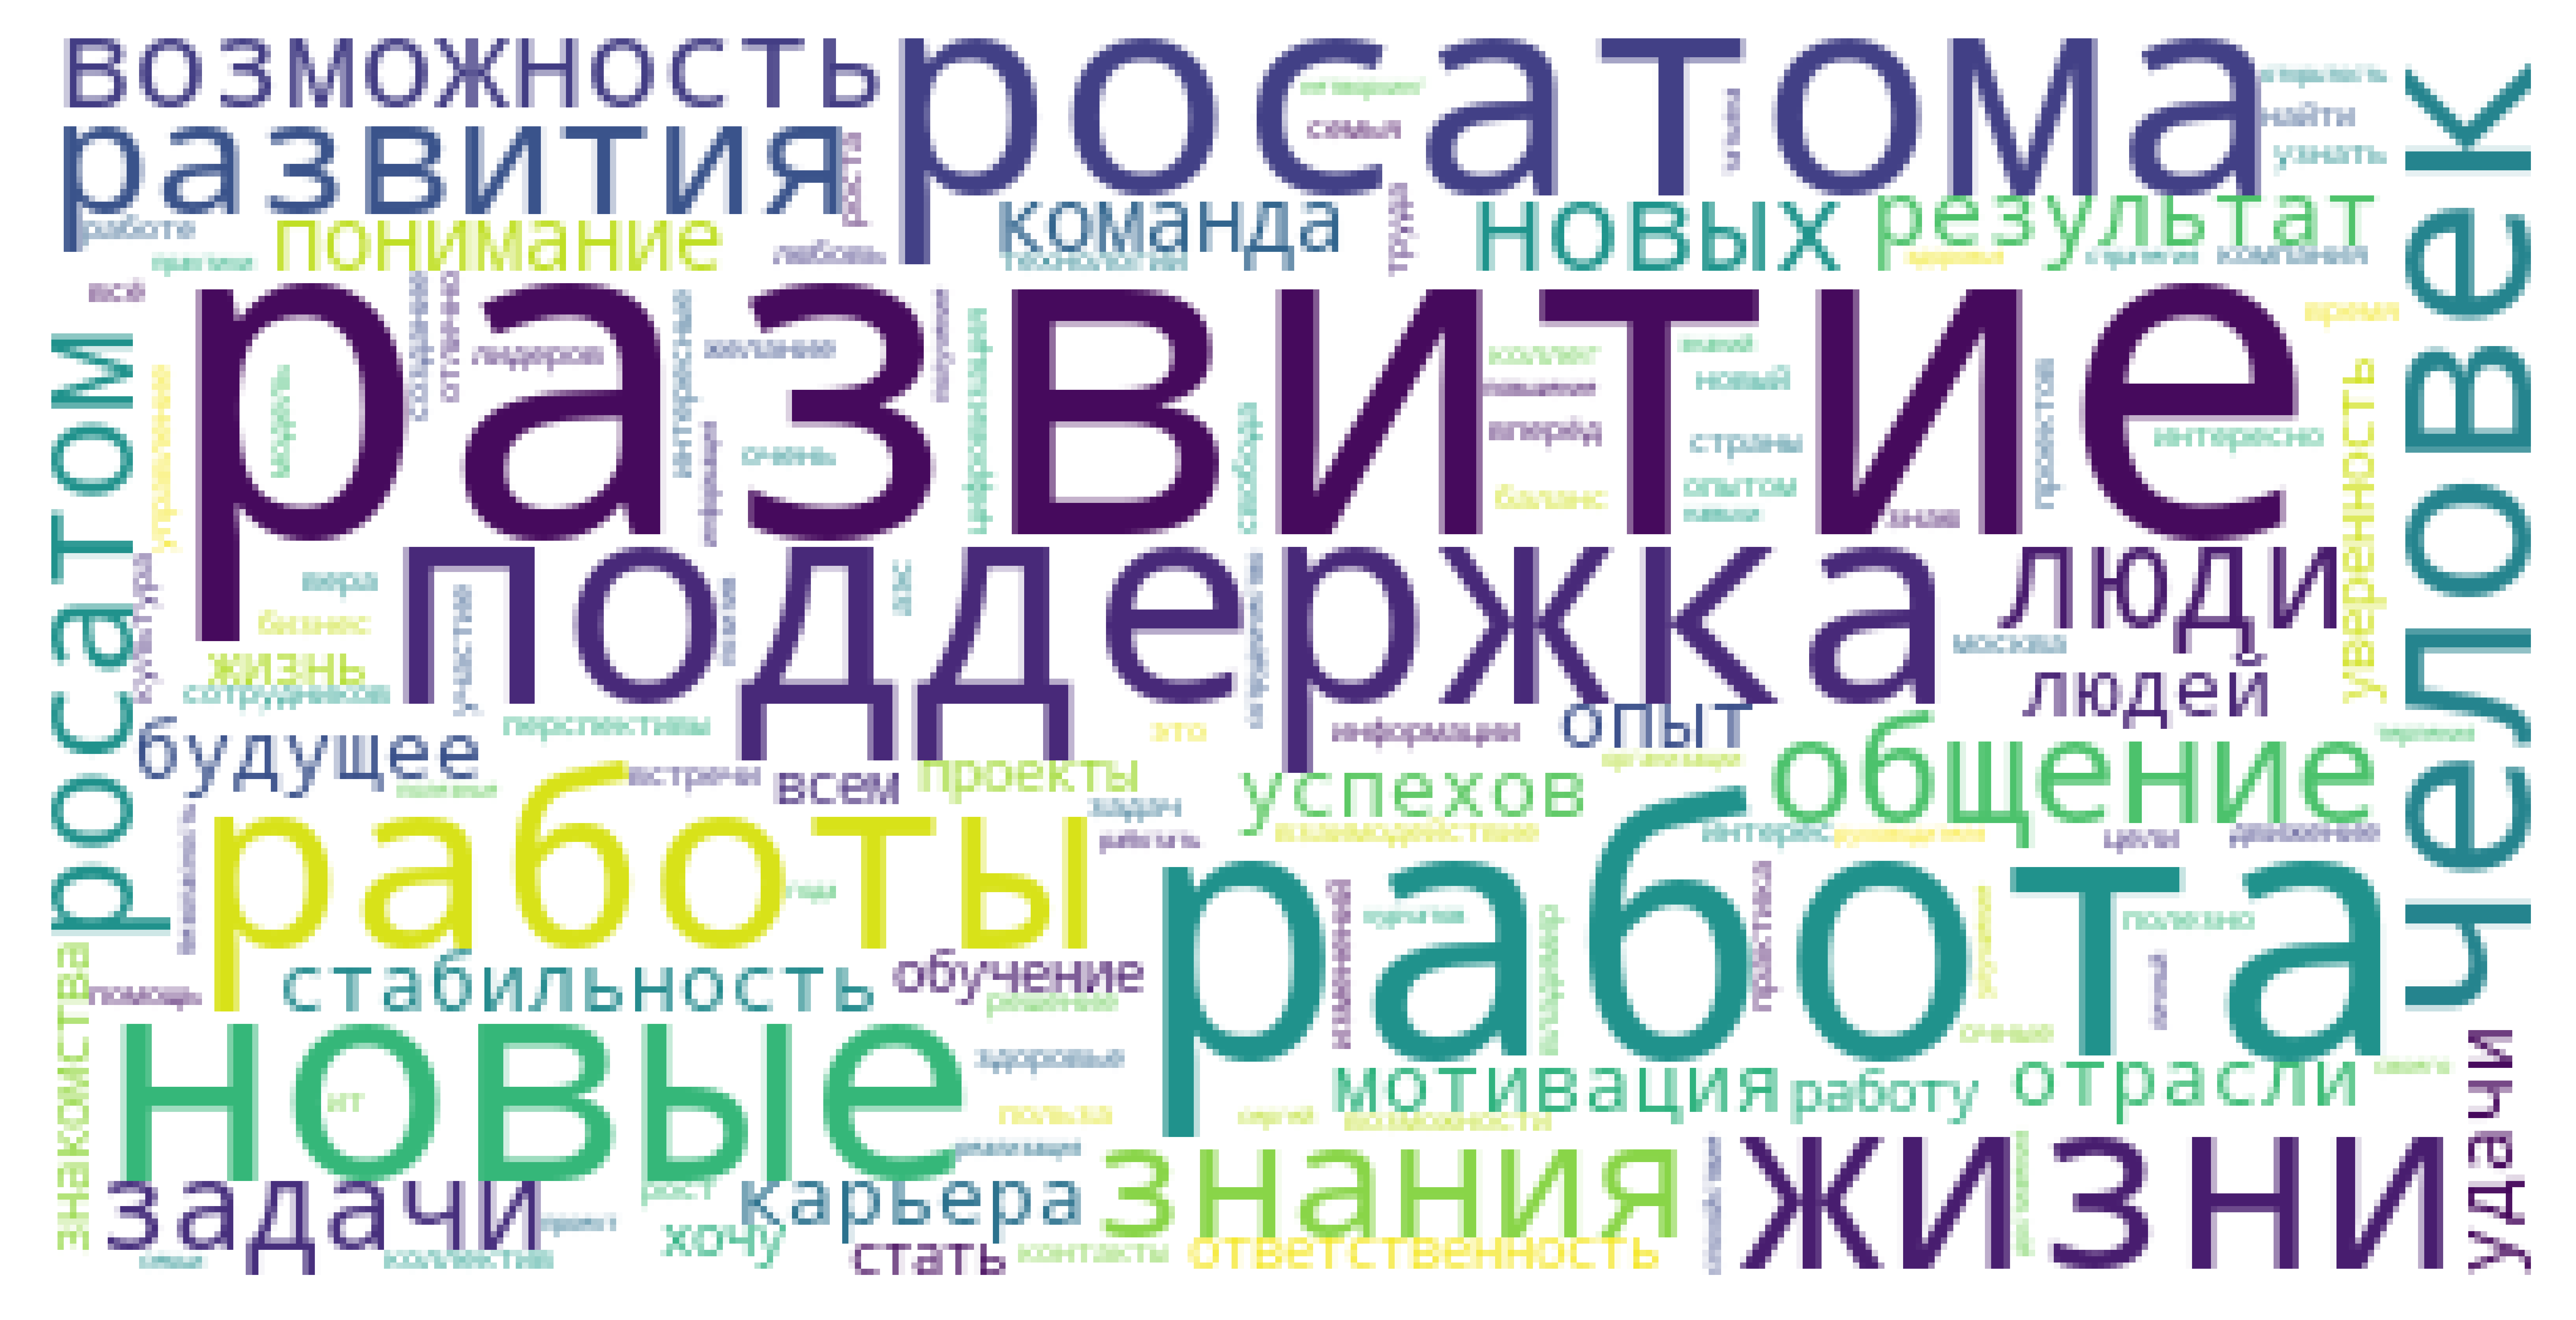

In [127]:
plt.figure(figsize=[10,7], dpi=1200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [128]:
dat['answer_text_clean'] = dat['answer_text_clean'].apply(lambda x: x.lower())

<ipython-input-128-564a8edc4c1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['answer_text_clean'] = dat['answer_text_clean'].apply(lambda x: x.lower())


In [129]:
text3 = " ".join(dat['answer_text_clean'].to_list())

In [131]:
wordcloud = WordCloud(stopwords=noise, 
                      background_color="white").generate(text3)

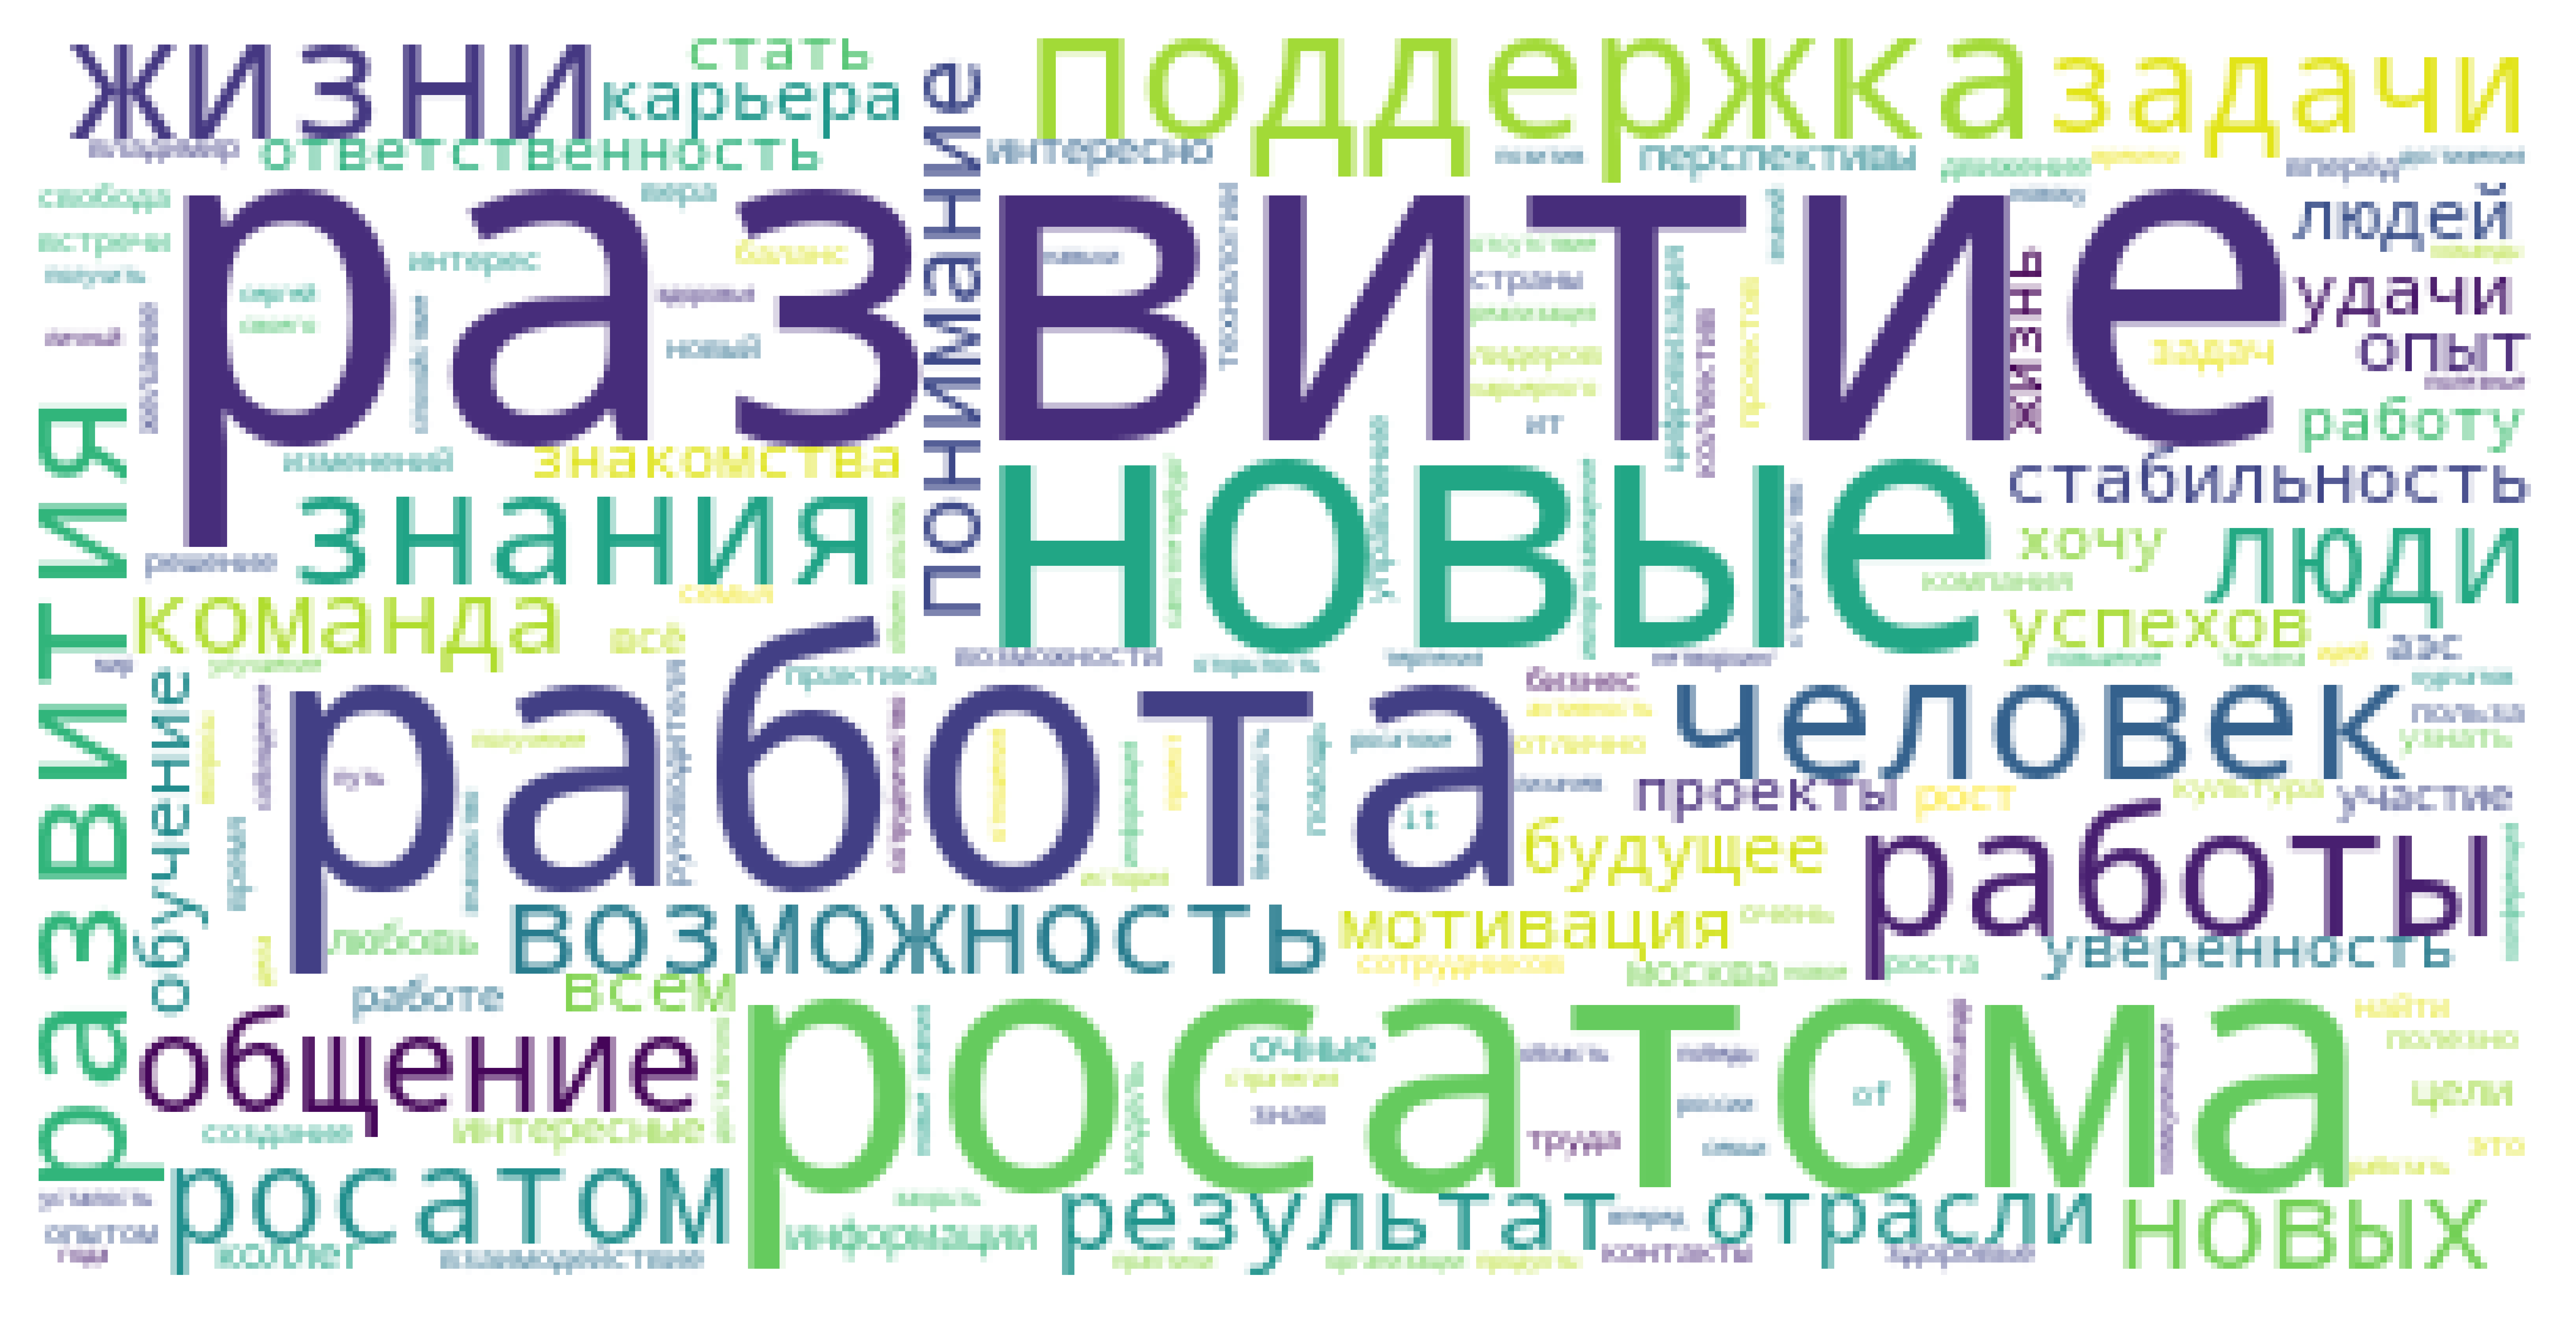

In [132]:
plt.figure(figsize=[10,7], dpi=1200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()